# Xarxes Neuronals

*Crèdit: http://blog.kaggle.com/2017/11/27/introduction-to-neural-networks/*

Here we have a collection of grayscale images, each a 2×2 grid of pixels where each pixel has an intensity value between 0 (white) and 255 (black). The goal is to build a model that identifies images with a “stairs” pattern.

![Dades](https://github.com/tnui2019/tnui2019.github.io/blob/master/notebooks/figures/fig1.png?raw=1)

For each image, we label the pixels $x_1, x_2, x_3, x_4$ and generate an input vector $\mathbf{x} = \begin{bmatrix}x_1, & x_2, & x_3, & x_4\end{bmatrix}$ which will be the input to our model. We expect our model to predict ``True`` (the image has the stairs pattern) or ``False`` (the image does not have the stairs pattern).


![Dades](https://github.com/tnui2019/tnui2019.github.io/blob/master/notebooks/figures/fig2.png?raw=1)


| ImageId | x1 | x2 | x3 | x4 | IsStairs | 
| ------- | -- | -- | -- | -- | -------- | 
| 1	      | 252| 4	| 155| 175| TRUE | 
| 2	      | 175| 10	| 186| 200| TRUE | 
| 3	      | 82 | 131| 230| 100| FALSE| 
| …	      | …  | …	| …	 | …  | … | 
| 498	  | 36 | 187| 43 | 249| FALSE | 
| 499	  | 1  | 160| 169| 242| TRUE | 
| 500	  | 198| 134| 22 | 188| FALSE | 


## Perceptron: a linear neural network (1957)

A simple model we could build is a single layer **perceptron**. 

A perceptron uses a weighted linear combination of the inputs to return a prediction score. If the prediction score exceeds a selected threshold, the perceptron predicts ``True``. Otherwise it predicts ``False``. More formally,

$$f(x)={\begin{cases} 1 &{\text{if }}\ w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 > b \\ 0 & {\text{otherwise}} \end{cases}} $$

Let’s re-express this as follows

$$\widehat y = \mathbf w \cdot \mathbf x + b $$

$$f(x)={\begin{cases} 1 &{\text{if }}\ \widehat{y} > 0\\ 0 & {\text{otherwise}} \end{cases}} $$

Here $\widehat{y}$ is our prediction score.

![Dades](https://github.com/tnui2019/tnui2019.github.io/blob/master/notebooks/figures/fig3.png?raw=1)


### Perceptron representation

For our example, suppose we build the following perceptron:

$$\widehat{y} = -0.0019x_1 + -0.0016x_2 + 0.0020x_3 + 0.0023x_4 + 0.0003 $$

Here’s how the perceptron would perform on some of our training images.

![Dades](https://github.com/tnui2019/tnui2019.github.io/blob/master/notebooks/figures/fig4.png?raw=1)

This would certainly be better than randomly guessing and it makes some logical sense:
+ All the stairs patterns have darkly shaded pixels in the bottom row which supports the positive coefficients for $x_3$ and $x_4$. 

Nonetheless, there are some glaring problems with this model.

1. The model outputs a real number whose value correlates with the concept of likelihood (higher values imply a greater probability the image represents stairs) but **there’s no basis to interpret the values as probabilities**, especially since they can be outside the range $[0, 1]$.

2. The model can’t capture the **non-linear relationship** between the variables and the target. To see this, consider the following hypothetical scenarios.

**Case A**

Start with an image, $x = [100, 0, 0, 125]$. Increase $x_3$ from 0 to 60.

![Dades](https://github.com/tnui2019/tnui2019.github.io/blob/master/notebooks/figures/fig5.png?raw=1)

**Case B**

Start with the last image, $x = [100, 0, 60, 125]$. Increase $x_3$ from 60 to 120.

![Dades](https://github.com/tnui2019/tnui2019.github.io/blob/master/notebooks/figures/fig6.png?raw=1)

Intuitively, ``Case A`` should have a much larger increase in $\widehat y$ than ``Case B``. 

However, since our perceptron model is a linear equation, the equivalent +60 change in $x_3$ resulted in an equivalent +0.12 change in $\widehat y$ for both cases.

There are more issues with our linear perceptron, but let’s start by addressing these two.

## Single Layer Perceptron with Sigmoid activation function (1986).

We can fix problems 1 and 2 above by wrapping our perceptron within a **sigmoid function** (and subsequently choosing different weights). 

The sigmoid function is an S shaped curve bounded on the vertical axis between 0 and 1, and is thus frequently used to model the probability of a binary event.

![Dades](https://github.com/tnui2019/tnui2019.github.io/blob/master/notebooks/figures/fig7.png?raw=1)

$$sigmoid(x) = \frac{1}{1 + e^{-x}} $$

Following this idea, we can update our model with the following picture and equation.

![Dades](https://github.com/tnui2019/tnui2019.github.io/blob/master/notebooks/figures/fig8.png?raw=1)

$$z = \mathbf w \cdot \mathbf x + b = w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + b $$

$$\widehat y = sigmoid(z) = \frac{1}{1 + e^{-z}} $$

> We can simplify notation by *absorving* $b$ in $\mathbf w$. This can be done by extending all examples with an extra dimension with value 1: $x = [100, 0, 0, 125] \rightarrow x = [100, 0, 0, 125, 1]$. Then, $\mathbf w$ will have an extra dimensional and its last value will represent $b$.

Since we now interpret $\widehat y$ as a probability, we must update our decision rule accordingly.

$$f(x)={\begin{cases} 1 &{\text{if }}\ \widehat{y} > 0.5\\ 0 & {\text{otherwise}} \end{cases}} $$

Continuing with our example problem, suppose we come up with the following fitted model:

$$\begin{bmatrix} w_1 & w_2 & w_3 & w_4 \end{bmatrix} = \begin{bmatrix} -0.140 & -0.145 & 0.121 & 0.092 \end{bmatrix} $$

$$b = -0.008 $$

$$\widehat y = \frac{1}{1 + e^{-(-0.140x_1 -0.145x_2 + 0.121x_3 + 0.092x_4 -0.008)}} $$

Observe how this model performs on the same sample images from the previous section.

![Dades](https://github.com/tnui2019/tnui2019.github.io/blob/master/notebooks/figures/fig9.png?raw=1)

Clearly this fixes problem 1 from above. 

Observe how it also fixes problem 2.

**Case A**

Start with an image, $x = [100, 0, 0, 125]$. Increase $x_3$ from 0 to 60.

![Dades](https://github.com/tnui2019/tnui2019.github.io/blob/master/notebooks/figures/fig10.png?raw=1)

**Case B**

Start with the last image, $x = [100, 0, 60, 125]$. Increase $x_3$ from 60 to 120.

![Dades](https://github.com/tnui2019/tnui2019.github.io/blob/master/notebooks/figures/fig11.png?raw=1)

Notice how the curvature of the sigmoid function causes ``Case A`` to “fire” (increase rapidly) as $z = \mathbf w \cdot \mathbf x$ increases, but the pace slows down as $z$ continues to increase. This aligns with our intuition that ``Case A`` should reflect a greater increase in the likelihood of stairs versus ``Case B``.

![Dades](https://github.com/tnui2019/tnui2019.github.io/blob/master/notebooks/figures/fig12.png?raw=1)

Unfortunately this model still has issues.

+ $\widehat y$ has a **monotonic relationship** with each variable. What if we want to identify lightly shaded stairs?

+ The model does not account for **variable interaction**. Assume the bottom row of an image is black. If the top left pixel is white, darkening the top right pixel should increase the probability of stairs. If the top left pixel is black, darkening the top right pixel should decrease the probability of stairs. In other words, increasing $x_3$ should potentially increase or decrease $\widehat y$ **depending on the values of the other variables**. Our current model has no way of achieving this.

> Observation: We cannot solve the XOR classification problem with a perceptron.

In [4]:
# implementation of a simple 1-layer multidimensional (4D) NN

import numpy as np

x = np.array([(47, 250, 8, 88, 1),
     (175, 10, 186, 200, 1),
     (82, 131, 230, 100, 1),
     (36, 187, 43, 249, 1),
     (1,160,169, 242, 1),
     (198, 134, 22, 188, 1)])

y = np.array([0,1,0,0,1,0])

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def logistic(x,w):
    return np.dot(x,w)

def classifier(x,w):
    return sigmoid(logistic(x,w))

w = np.array([-0.140, -0.145, 0.121, 0.092, -0.008])

print(classifier(x[0],w))
print(classifier(x[1],w))

2.1485139022961816e-15
0.9999996777700199


## Multi-Layer Perceptron with Sigmoid activation function (1986)

We can solve both of the above issues by **adding an extra layer** to our perceptron model. 

We’ll construct a number of base models like the one above, but then we’ll feed the output of each base model as input into another perceptron. This model is in fact a **vanilla neural network**. 

Let’s see how it might work on some examples.

#### Example 1: Identify the stairs pattern

+ Build a model that fires when “left stairs” are identified, $\widehat y_{left}$
+ Build a model that fires when “right stairs” are identified, $\widehat y_{right}$
+ Add the score of the base models so that the final sigmoid function fires if $\widehat y_{left}$ or $\widehat y_{right}$ is large.

![Dades](https://github.com/tnui2019/tnui2019.github.io/blob/master/notebooks/figures/fig13.png?raw=1)
![Dades](https://github.com/tnui2019/tnui2019.github.io/blob/master/notebooks/figures/fig14.png?raw=1)

Alternatively

+ Build a model that fires when the bottom row is dark, $\widehat y_1$
+ Build a model that fires when the top left pixel is dark and the top right pixel is light, $\widehat y_2$
+ Build a model that fires when the top left pixel is light and the top right pixel is dark, $\widehat y_3$
+ Add the base models so that the final sigmoid function only fires if $\widehat y_1$ and $\widehat y_2$ are large, or $\widehat y_1$ and $\widehat y_3$ are large. (Note that $\widehat y_2$ and $\widehat y_3$ cannot both be large)

![Dades](https://github.com/tnui2019/tnui2019.github.io/blob/master/notebooks/figures/fig15.png?raw=1)
![Dades](https://github.com/tnui2019/tnui2019.github.io/blob/master/notebooks/figures/fig16.png?raw=1)


#### Example 2: Identify lightly shaded stairs

+ Build models that fire for “shaded bottom row”, “shaded x1 and white x2”, “shaded x2 and white x1”, $\widehat y_1$, $\widehat y_2$, and $\widehat y_3$
+ Build models that fire for “dark bottom row”, “dark x1 and white x2”, “dark x2 and white x1”, $\widehat y_4$, $\widehat y_5$, and $\widehat y_6$
+ Combine the models so that the “dark” identifiers are essentially subtracted from the “shaded” identifiers before squashing the result with a sigmoid function.

![Dades](https://github.com/tnui2019/tnui2019.github.io/blob/master/notebooks/figures/fig17.png?raw=1)
![Dades](https://github.com/tnui2019/tnui2019.github.io/blob/master/notebooks/figures/fig18.png?raw=1)

A single-layer perceptron has a single output layer. Consequently, the models we just built would be called **two-layer perceptrons** because they have an output layer which is the input to another output layer. 

However, we could call these same models **neural networks**, and in this respect the networks have three layers – an input layer, a hidden layer, and an output layer.

![Dades](https://github.com/tnui2019/tnui2019.github.io/blob/master/notebooks/figures/fig19.png?raw=1)

## Alternative activation functions (2012)

In our examples we used a sigmoid activation function. However, we could use other activation functions. ``tanh`` and ``relu`` are common choices today because of training issues when learning the optimal weights.

> WARNING: The activation function **must be non-linear**, otherwise the neural network would simplify to an equivalent single layer perceptron.

In [2]:
def relu(x):
    return max(0,x)

print(relu(-3.0), relu(4))

0 4


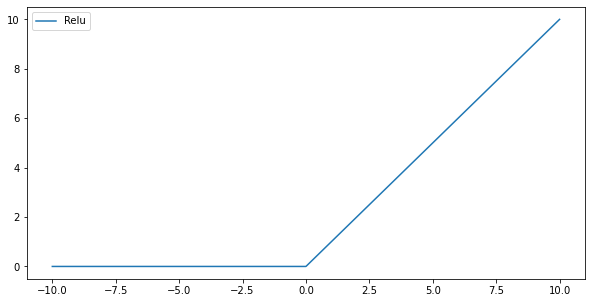

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 1000)
y = np.maximum(0, x)

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.legend(['Relu'])
plt.show()

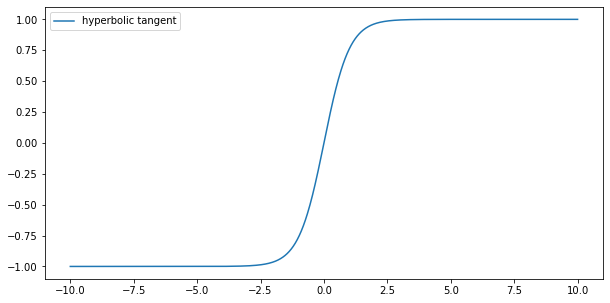

In [2]:
x = np.linspace(-10, 10, 1000)
y = ( 2 / (1 + np.exp(-2*x) ) ) -1

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.legend(['hyperbolic tangent'])
plt.show()

## Multiclass classification

We can easily extend our model to work for multiclass classification by using multiple nodes in the final output layer. 

The idea here is that each output node corresponds to one of the $C$ classes we are trying to predict. Instead of squashing the output with the sigmoid function which maps an element in $\mathbb{R}$ to and element in $[0, 1]$, we can use the **softmax function** which maps a vector in $\mathbb{R}^n$ to a vector in $\mathbb{R}^n$ such that the resulting vector elements sum to 1. 

$$ \mbox{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}}$$

In other words, we can design the network such that it outputs the vector $[prob(class_1), prob(class_2), …, prob(class_C)]$.

![Dades](https://github.com/tnui2019/tnui2019.github.io/blob/master/notebooks/figures/fig20.png?raw=1)

## Deep Learning: Using more than two layers (2012)

You might be wondering, “Can we extend our vanilla neural network so that its output layer is fed into a 4th layer (and then a 5th, and 6th, etc.)?”. 

Yes. This is what’s commonly referred to as **"deep learning”**. 

In practice it can be very effective. However, it’s worth noting that, in theory,  any network you build with more than one hidden layer can be mimicked by a network with only one hidden layer. 

In fact, **you can approximate any continuous function using a neural network with a single hidden layer as per the Universal Approximation Theorem**. 

The reasons deep neural network architectures are chosen in favor of single hidden layer architectures are:
+ they converge to a solution during the fitting procedure much more often and much more faster.
+ they use less parameters.

![Dades](https://github.com/tnui2019/tnui2019.github.io/blob/master/notebooks/figures/fig21.png?raw=1)

## Fitting the model to labeled training samples (Backpropagation)

Alas we come to the fitting procedure. 

So far we’ve discussed how neural networks could work effectively, but we haven’t discussed how to fit a neural network to labeled training samples. 

An equivalent question would be, **“How can we choose the best weights for a network, given some labeled training samples?”**. 

**Stochastic gradient descent** is the common answer. 

Continuing with our example problem, the gradient descent procedure would go something like this:

1. Start with some labeled training data
2. Choose a differentiable loss function to minimize, $L(\mathbf{\widehat Y}, \mathbf{Y})$
3. Choose a network structure. Specifically detemine how many layers and how many nodes in each layer.
4. Initialize the network’s weights randomly
5. Run a training data point through the network to generate a prediction. Measure the overall error according to the loss function, $L(\mathbf{\widehat Y}, \mathbf{Y})$. (This is called forward propagation)
6. Determine how much the current loss will change with respect to a small change in each of the weights. In other words, calculate the gradient of $L$ with respect to every weight in the network. (This is called backward propagation)
7. Take a small “step” in the direction of the negative gradient. For example, if $w_{23} = 1.5$ and $\frac{\partial L}{\partial w_{23}} = 2.2$, then decreasing $w_{23}$ by a small amount should result in a small decrease in the current loss. Hence we update $w_3 := w_3 - 2.2 \times 0.001$ (where $0.001$ is our predetermined “step size”).
8. Repeat this process (from step 5) a fixed number of epochs (until the loss converges).

That’s the basic idea at least. In practice, this poses a number of challenges.

## Example

We will use the following loss function (**binary cross-entropy**):

$$ L(\mathbf{Y}, \mathbf{\widehat Y}) = - \frac{1}{n} \sum_{i=1}^n 
 y_i  log({\widehat y}_i) + (1 - {y}_i ) log(1- {\widehat y}_i)) $$


In [5]:
import numpy as np

def loss(preds, targets): 
    label_probabilities = preds * targets + (1 - preds) * (1 - targets)
    return -np.sum(np.log(label_probabilities))

a = np.array([1.0, 1.0, 0.0, 1.0])
b = np.array([0.93, 0.7, 0.002, 0.99])
c = np.array([0.003, 0.007, 0.9, 0.009])
print(loss(a,a), loss(a,b), loss(a,c))

-0.0 0.44129797529774234 17.784103914880816


In [6]:
# autograd is a 'magical' function that is able of computing the 
# gradient of any (composed) function f in a point x: f'(x). 
# It is based in a technique called Automatic Differentiation

!pip install autograd

Defaulting to user installation because normal site-packages is not writeable
  Using cached autograd-1.3.tar.gz (38 kB)
  Using cached future-0.18.2.tar.gz (829 kB)
  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47989 sha256=e9d19b9676d7f7ff10d12ccf99d4349fcd911b9632ece4d2dcee0186df10b3be
  Stored in directory: /Users/jordivitria/Library/Caches/pip/wheels/85/f5/d2/3ef47d3a836b17620bf41647222825b065245862d12aa62885
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=6f8be456112fb55b72c873d26a5857e945875f371f9ada69c3da9a5f9d177b36
  Stored in directory: /Users/jordivitria/Library/Caches/pip/wheels/8e/70/28/3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4
Successfully built autograd future
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
import autograd.numpy as np
from autograd import grad

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_predictions(weights, inputs):
    return sigmoid(np.dot(inputs, weights))

def training_loss(weights, inputs, targets): 
    preds = logistic_predictions(weights, inputs)
    return -np.sum(targets * np.log(preds) + (1 - targets) * np.log(1-preds))

def optimize(inputs, targets, training_loss):
    # Optimize weights using non-stochastic gradient descent.
    gradient_loss = grad(training_loss)
    weights = np.zeros(inputs.shape[1])
    print("Init: ", 
          '%2.2f'%training_loss(weights, inputs, targets),
          weights)
    for i in range(1000):
        weights -= gradient_loss(weights, inputs, targets) * 0.01
        if i%100 == 0:
            print(" Loss:", 
                  '%2.2f'%training_loss(weights, inputs, targets),
                 weights)
    print("End : ", 
          '%2.2f'%training_loss(weights, inputs, targets),
          weights)
    return weights

# Build a toy dataset.
inputs = np.array([[0.52, 1.12,  0.77, 1.0],
                   [0.88, -1.08, 0.15, 1.0],
                   [0.52, 0.06, -1.30, 1.0],
                   [0.74, -2.49, 1.39, 1.0]])
targets = np.array([1.0, 1.0, 0.0, 1.0])

weights = optimize(inputs, targets, training_loss)

Init:  2.77 [0. 0. 0. 0.]
 Loss: 2.71 [ 0.0081  -0.01255  0.01805  0.01   ]
 Loss: 0.96 [ 0.37195512 -0.34642742  1.0705056   0.43303301]
 Loss: 0.60 [ 0.5195871  -0.39505385  1.62721825  0.58118367]
 Loss: 0.43 [ 0.61898168 -0.42814886  2.00808801  0.67393032]
 Loss: 0.34 [ 0.69560711 -0.45794972  2.29579094  0.74290165]
 Loss: 0.28 [ 0.75838086 -0.485609    2.52629206  0.79825975]
 Loss: 0.23 [ 0.81164767 -0.51130841  2.71829031  0.84461699]
 Loss: 0.20 [ 0.85792522 -0.53518076  2.88267387  0.88451591]
 Loss: 0.18 [ 0.89882901 -0.55738105  3.02631358  0.91953264]
 Loss: 0.16 [ 0.9354666  -0.57807137  3.1538133   0.95072162]
End :  0.14 [ 0.96831706 -0.5972198   3.26731414  0.97855913]


**Exercise**: Change the code to perform stochastic gradient descend.

## Scikit Learn Multi-layer Perceptron

MLP trains on two arrays: array ``X`` of size ``(n_samples, n_features)``, which holds the training samples represented as floating point feature vectors; and array ``y`` of size ``(n_samples,)``, which holds the target values (class labels) for the training samples:

In [136]:
##### from sklearn.neural_network import MLPClassifier
X = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
y = [0,1,1,0]                     

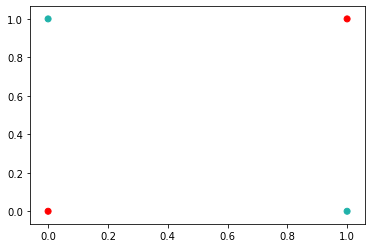

In [137]:
import numpy as np
import matplotlib.pyplot as plt
colormap = np.array(['red', 'lightseagreen'])

plt.scatter(X[:,0], X[:,1],c=colormap[y])

In [139]:
clf = MLPClassifier(activation='relu',  
                    max_iter=100000,
                    hidden_layer_sizes=(4,2))
clf.fit(X, y)    
print('score:', clf.score(X, y)) 


score: 1.0


After fitting (training), the model can predict labels for new samples:

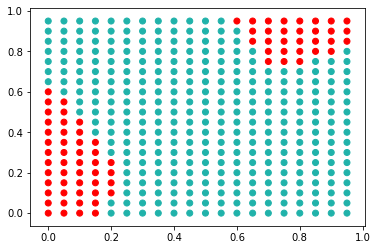

In [140]:
import numpy as np
import matplotlib.pyplot as plt

x1grid = np.arange(0.0, 1.0, 0.05)
x2grid = np.arange(0.0, 1.0, 0.05)
xx, yy = np.meshgrid(x1grid, x2grid)
yyy = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx, yy,c=colormap[yyy])

MLP can fit a non-linear model to the training data. 

``clf.coefs_`` contains the weight matrices that constitute the model parameters:

In [121]:
[coef.shape for coef in clf.coefs_]
[(2, 5), (5, 2), (2, 1)]

[(2, 5), (5, 2), (2, 1)]

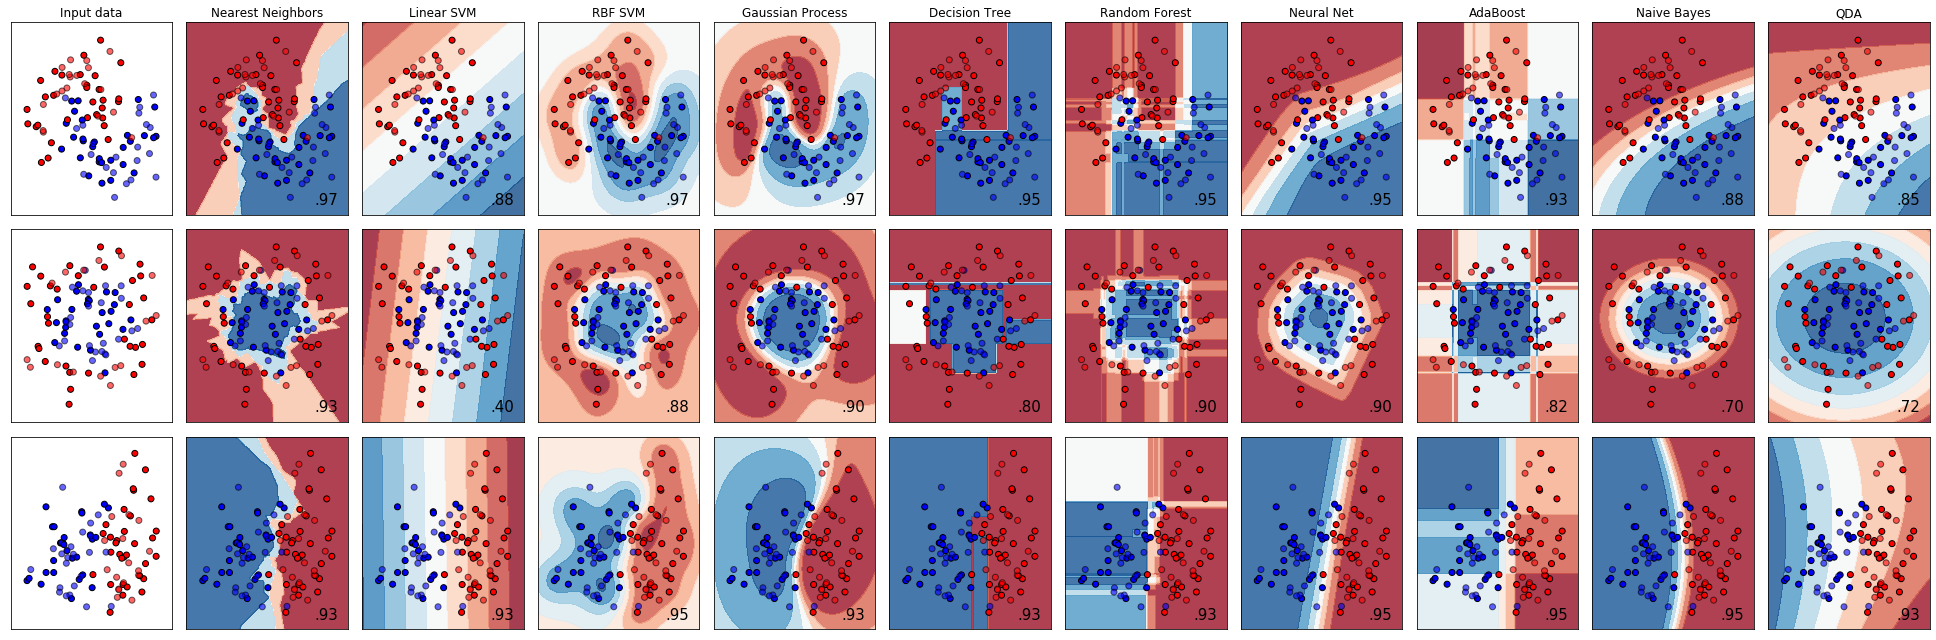

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

Tensorflow playground:

https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=4,2&seed=0.43197&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false